In [27]:
# ---------------------------------------------------------
# IMPORT
# ---------------------------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold, StratifiedKFold
from sklearn.metrics import (
    accuracy_score, mean_squared_error,
    precision_score, recall_score, f1_score
)

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression



In [28]:
data = load_breast_cancer()
X = data.data
y = data.target

scaler = StandardScaler()
X = scaler.fit_transform(X)


In [29]:
def evaluate_model(model, X, y, setting_name):
    # Accuracy (5-fold stratified)
    acc_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    mean_acc = acc_scores.mean()
    std_acc = acc_scores.std()

    # Predictions
    y_pred = cross_val_predict(model, X, y, cv=5)

    # Regression-like metrics
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)

    # Classification metrics
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)

    return {
        "model": model.__class__.__name__,
        "setting": setting_name,
        "mean_accuracy": mean_acc,
        "std_accuracy": std_acc,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "MSE": mse,
        "RMSE": rmse
    }

In [30]:
results = []

results.append(evaluate_model(
    XGBClassifier(max_depth=4, n_estimators=200, learning_rate=0.1, eval_metric='logloss'),
    X, y,
    "max_depth=4, lr=0.1"
))

results.append(evaluate_model(
    RandomForestClassifier(n_estimators=200, random_state=42),
    X, y,
    "200 trees"
))

results.append(evaluate_model(
    SVC(kernel='rbf', C=1, probability=True),
    X, y,
    "RBF, C=1"
))

results.append(evaluate_model(
    LogisticRegression(max_iter=2000),
    X, y,
    "max_iter=2000"
))

df_results = pd.DataFrame(results)
print(df_results)



                    model              setting  mean_accuracy  std_accuracy  \
0           XGBClassifier  max_depth=4, lr=0.1       0.977146      0.014264   
1  RandomForestClassifier            200 trees       0.957848      0.023767   
2                     SVC             RBF, C=1       0.973638      0.014679   
3      LogisticRegression        max_iter=2000       0.980686      0.006539   

   precision    recall        f1       MSE      RMSE  
0   0.977778  0.985994  0.981869  0.022847  0.151153  
1   0.961219  0.971989  0.966574  0.042179  0.205376  
2   0.975000  0.983193  0.979079  0.026362  0.162364  
3   0.977901  0.991597  0.984701  0.019332  0.139040  


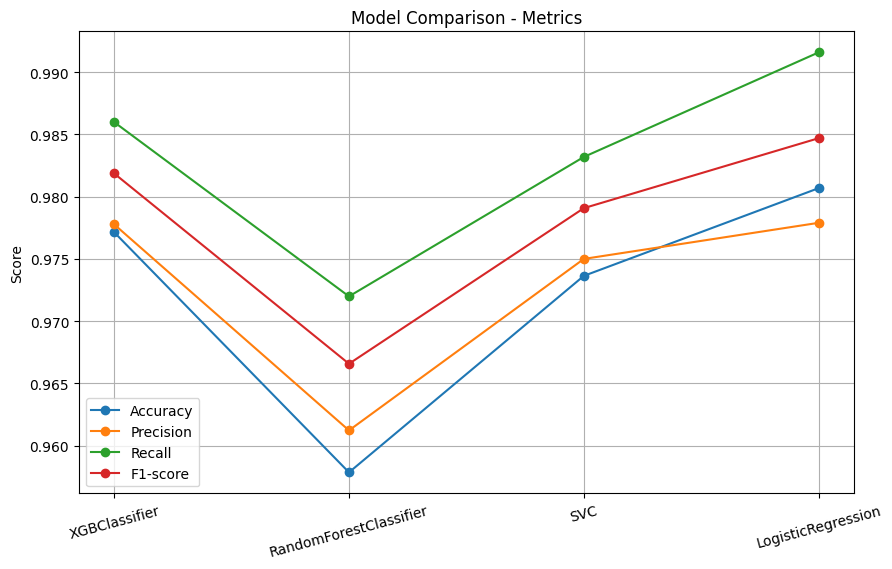

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(df_results["model"], df_results["mean_accuracy"], marker='o', label="Accuracy")
plt.plot(df_results["model"], df_results["precision"], marker='o', label="Precision")
plt.plot(df_results["model"], df_results["recall"], marker='o', label="Recall")
plt.plot(df_results["model"], df_results["f1"], marker='o', label="F1-score")

plt.title("Model Comparison - Metrics")
plt.ylabel("Score")
plt.grid(True)
plt.legend()
plt.xticks(rotation=15)
plt.show()